In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read CSV files
df = pd.read_csv('C:/Users/DIMO/Desktop/WORK SPACE/Churn_Train.csv')
df.head(5)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,NV,125.0,area_code_510,no,no,0.0,2013.4,99.0,28.66,1107.6,107.0,14.93,243.3,92,10.95,10.9,7.0,2.94,0.0,no
1,HI,108.0,area_code_415,no,no,0.0,291.6,99.0,49.57,221.1,93.0,18.79,229.2,110,10.31,14.0,9.0,3.78,2.0,yes
2,DC,82.0,area_code_415,no,no,0.0,300.3,109.0,51.05,181.0,100.0,15.39,270.1,73,12.15,11.7,4.0,3.16,0.0,yes
3,HI,NaN,area_code_408,no,yes,30.0,110.3,71.0,18.75,182.4,108.0,15.50,183.8,88,8.27,11.0,8.0,2.97,2.0,no
4,OH,83.0,area_code_415,no,no,0.0,337.4,120.0,57.36,227.4,116.0,19.33,153.9,114,6.93,15.8,7.0,4.27,0.0,yes


In [3]:
df.shape

(3333, 20)

# Exploratory Data Analysis
Exploring the dataset to have a general undestanding.
Dealing with missing data and duplicates

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          3333 non-null   object 
 1   account_length                 2832 non-null   float64
 2   area_code                      3333 non-null   object 
 3   international_plan             3333 non-null   object 
 4   voice_mail_plan                3333 non-null   object 
 5   number_vmail_messages          3133 non-null   float64
 6   total_day_minutes              3133 non-null   float64
 7   total_day_calls                3133 non-null   float64
 8   total_day_charge               3133 non-null   float64
 9   total_eve_minutes              3032 non-null   float64
 10  total_eve_calls                3133 non-null   float64
 11  total_eve_charge               3133 non-null   float64
 12  total_night_minutes            3133 non-null   f

In [5]:
# Checking for missing values
df.isna().sum()

state                              0
account_length                   501
area_code                          0
international_plan                 0
voice_mail_plan                    0
number_vmail_messages            200
total_day_minutes                200
total_day_calls                  200
total_day_charge                 200
total_eve_minutes                301
total_eve_calls                  200
total_eve_charge                 200
total_night_minutes              200
total_night_calls                  0
total_night_charge               200
total_intl_minutes               200
total_intl_calls                 301
total_intl_charge                200
number_customer_service_calls    200
churn                              0
dtype: int64

In [6]:
df[df['total_day_calls'].isna()]

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
11,MI,NaN,area_code_415,yes,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110,NaN,NaN,NaN,NaN,NaN,yes
31,MA,NaN,area_code_510,no,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,126,NaN,NaN,NaN,NaN,NaN,yes
32,NY,NaN,area_code_415,no,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100,NaN,NaN,NaN,NaN,NaN,no
41,AK,NaN,area_code_510,yes,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98,NaN,NaN,NaN,NaN,NaN,no
74,NV,NaN,area_code_415,no,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98,NaN,NaN,NaN,NaN,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3223,RI,NaN,area_code_510,yes,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102,NaN,NaN,NaN,NaN,NaN,yes
3234,CA,NaN,area_code_510,no,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,109,NaN,NaN,NaN,NaN,NaN,no
3267,KS,NaN,area_code_415,no,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,114,NaN,NaN,NaN,NaN,NaN,no
3275,KY,NaN,area_code_510,yes,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,143,NaN,NaN,NaN,NaN,NaN,yes


In [7]:
# Droping missing values
df =df.dropna()

In [8]:
df.shape

(2630, 20)

<AxesSubplot:xlabel='churn', ylabel='count'>

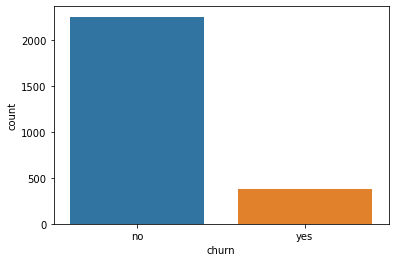

In [9]:
# CHECK THE DISTRIBUTION OF THE OUTPUT FEATURES FOR IMBALANCE
sns.countplot(x= df['churn'])

In [10]:
#Reducing the majority class (Undersampling Technique) to balance the distribution of the Taget Variable
df1 = df.drop(df[df.churn.eq('no')].sample(frac = .7).index)

In [11]:
df1['churn'].value_counts()

no     675
yes    380
Name: churn, dtype: int64

In [12]:
df1.isna().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [13]:
# Checking for duplicates in the dataset
df1.duplicated().sum()

0

In [14]:
# DEALING WITH CATEGORICAL FEATURES
from sklearn.preprocessing import LabelEncoder

In [15]:
le = LabelEncoder()
df1['state'] = le.fit_transform(df1['state'])
df1['area_code'] = le.fit_transform(df1['area_code'])
df1['international_plan'] = le.fit_transform(df1['international_plan'])
df1['voice_mail_plan'] = le.fit_transform(df1['voice_mail_plan'])
df1['churn'] = le.fit_transform(df1['churn'])

In [16]:
df1

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,11,108.0,1,0,0,0.0,291.6,99.0,49.57,221.1,93.0,18.79,229.2,110,10.31,14.0,9.0,3.78,2.0,1
2,7,82.0,1,0,0,0.0,300.3,109.0,51.05,181.0,100.0,15.39,270.1,73,12.15,11.7,4.0,3.16,0.0,1
4,35,83.0,1,0,0,0.0,337.4,120.0,57.36,227.4,116.0,19.33,153.9,114,6.93,15.8,7.0,4.27,0.0,1
10,8,125.0,0,0,0,0.0,126.7,108.0,21.54,206.0,90.0,17.51,247.8,114,11.15,13.3,7.0,3.59,1.0,0
15,25,131.0,1,0,0,0.0,2019.3,95.0,22.37,1111.3,109.0,15.24,251.2,129,11.30,15.5,3.0,4.19,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3315,49,145.0,0,0,1,31.0,216.0,94.0,36.72,225.1,123.0,19.13,234.7,109,10.56,10.7,1.0,2.89,2.0,0
3319,17,119.0,2,0,0,0.0,2094.9,122.0,37.88,1095.2,107.0,13.87,160.6,112,7.23,11.2,6.0,3.02,1.0,0
3320,40,101.0,1,0,0,0.0,158.4,92.0,26.93,188.0,117.0,15.98,219.7,125,9.89,13.5,4.0,3.65,4.0,1
3323,14,127.0,2,0,0,0.0,220.2,108.0,37.43,188.4,124.0,16.01,172.7,113,7.77,11.7,3.0,3.16,2.0,0


<AxesSubplot:>

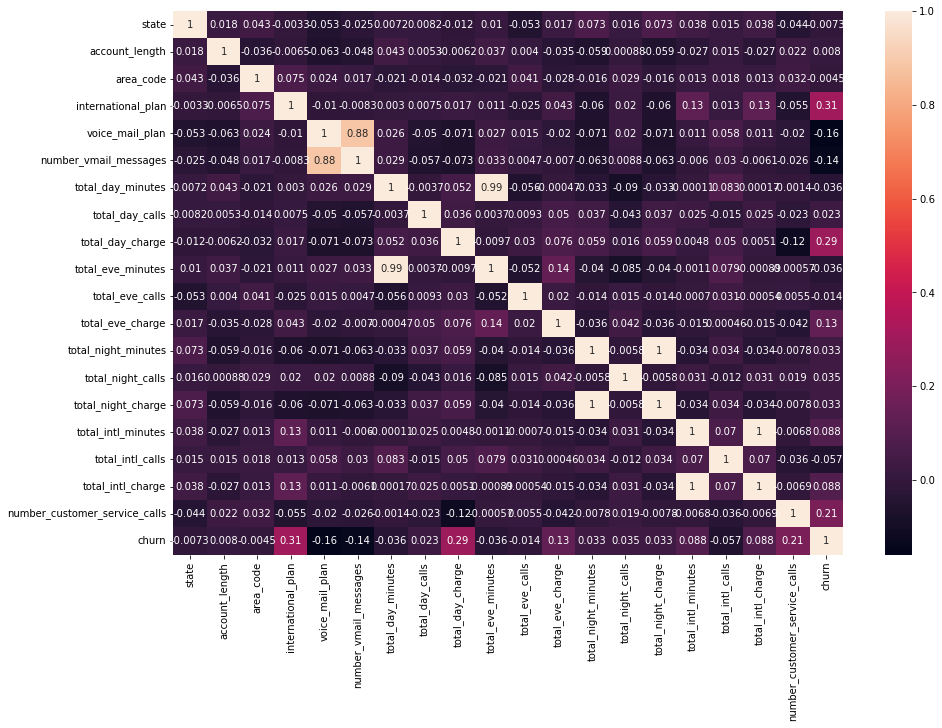

In [17]:
# CHECKING FOR MULTI-COLLINEARITY
plt.figure(figsize=(15,10))
sns.heatmap(df1.corr(),annot = True)

In [18]:
# Droping features that are correlated
df2 = df1.drop(columns=['total_eve_minutes','total_night_minutes','total_intl_minutes'],axis=1)

In [19]:
df2

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,11,108.0,1,0,0,0.0,291.6,99.0,49.57,93.0,18.79,110,10.31,9.0,3.78,2.0,1
2,7,82.0,1,0,0,0.0,300.3,109.0,51.05,100.0,15.39,73,12.15,4.0,3.16,0.0,1
4,35,83.0,1,0,0,0.0,337.4,120.0,57.36,116.0,19.33,114,6.93,7.0,4.27,0.0,1
10,8,125.0,0,0,0,0.0,126.7,108.0,21.54,90.0,17.51,114,11.15,7.0,3.59,1.0,0
15,25,131.0,1,0,0,0.0,2019.3,95.0,22.37,109.0,15.24,129,11.30,3.0,4.19,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3315,49,145.0,0,0,1,31.0,216.0,94.0,36.72,123.0,19.13,109,10.56,1.0,2.89,2.0,0
3319,17,119.0,2,0,0,0.0,2094.9,122.0,37.88,107.0,13.87,112,7.23,6.0,3.02,1.0,0
3320,40,101.0,1,0,0,0.0,158.4,92.0,26.93,117.0,15.98,125,9.89,4.0,3.65,4.0,1
3323,14,127.0,2,0,0,0.0,220.2,108.0,37.43,124.0,16.01,113,7.77,3.0,3.16,2.0,0


In [20]:
# DATA TRANSFORMATION
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [21]:
array = df2.values
x = array[:,0:16]
y = array[:,16]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=101)

In [22]:
scaler = StandardScaler()
scaledX_train = scaler.fit_transform(X_train)
scaledX_test = scaler.transform(X_test)

In [23]:
# MODEL BUILDING
# Import model
from sklearn.linear_model import LogisticRegression

In [24]:
# Training of model
log_model = LogisticRegression()
log_model.fit(scaledX_train, y_train)

LogisticRegression()

In [25]:
# Model Predictions
y_pred = log_model.predict(scaledX_test)
y_pred

array([1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
       0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 1.])

In [26]:
y_test

array([1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1.,
       1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0.,
       0., 1., 1., 0.])

In [27]:
# CHECK MODEL ACCURACY
result = log_model.score(scaledX_test, y_test)
print('Accuracy: {}'.format(result * 100))

Accuracy: 75.47169811320755


# FINDINGS

Logistic Regression performed well on this data with a 75% accuracy.
The data preprocessing techniques used exposed the training set and problem to the model.
By using undersampling technique on the taget variable to deal with the imbalance problem we saw, helped in getting good
accuracy score.